In [1]:
# Step 1: Install necessary libraries (uncomment these if not already installed)
# !pip install deepface
# !pip install opencv-python-headless
# !pip install matplotlib

# Step 2: Import libraries
import zipfile
import os
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2



In [2]:

# Step 3: Automatically use captured_frames.zip in the same directory
zip_filename = "captured_frames.zip"

# Check if the file exists
if os.path.exists(zip_filename):
    # Extract zip file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("images")

    # Verify extraction
    if not os.path.exists("images"):
        print("Image extraction failed.")
    else:
        print(f"Images extracted successfully to: {os.path.abspath('images')}")
else:
    print(f"File '{zip_filename}' not found. Please ensure it is in the same directory.")


Images extracted successfully to: C:\Users\GaddoStaffu\Desktop\CNN\images


In [3]:

# Step 4: Define function to analyze emotions with added debugging
def analyze_emotions(image_path):
    print(f"Analyzing {image_path}...")
    try:
        result = DeepFace.analyze(image_path, actions=['emotion'], enforce_detection=False)
        emotion = result[0]['dominant_emotion']
        print(f"Detected emotion: {emotion}")
        return emotion
    except Exception as e:
        print(f"Error analyzing {image_path}: {e}")
        return None


Analyzing images\frame_0.jpg...
Detected emotion: sad


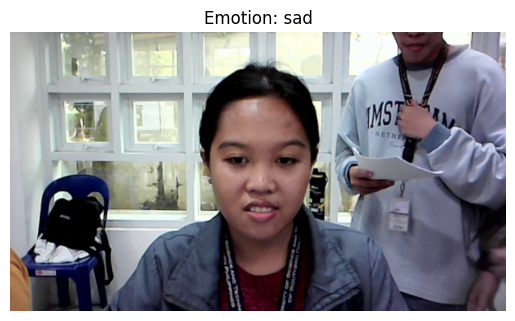

Analyzing images\frame_1.jpg...
Detected emotion: neutral


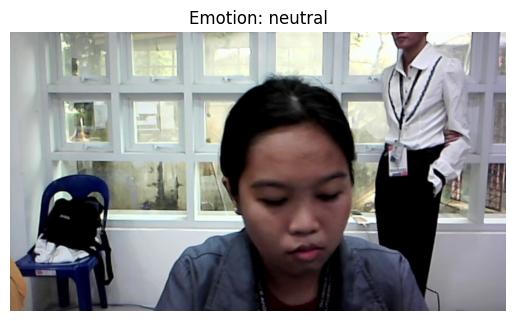

Analyzing images\frame_10.jpg...
Detected emotion: sad


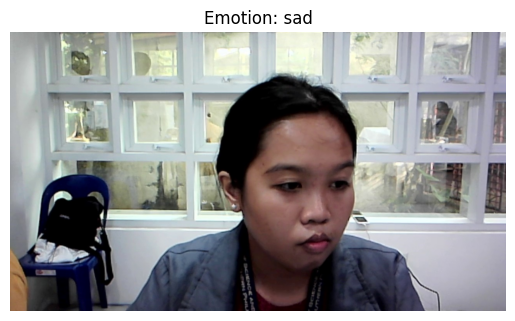

Analyzing images\frame_11.jpg...
Detected emotion: sad


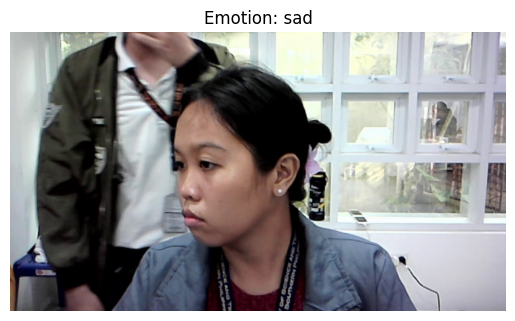

Analyzing images\frame_12.jpg...
Detected emotion: neutral


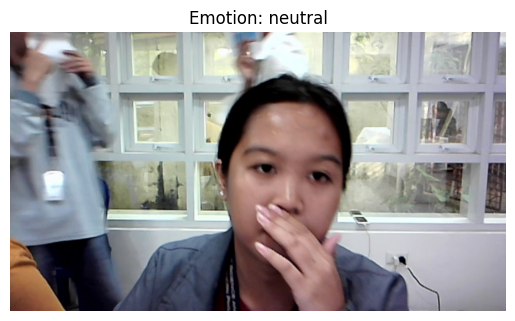

Analyzing images\frame_13.jpg...
Detected emotion: sad


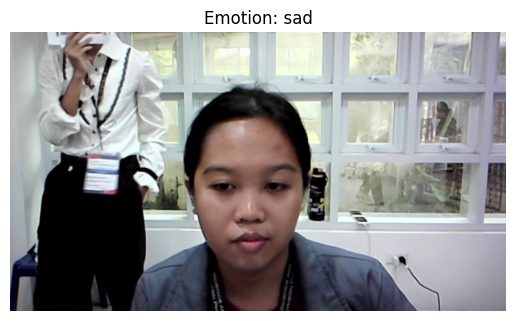

Analyzing images\frame_14.jpg...
Detected emotion: sad


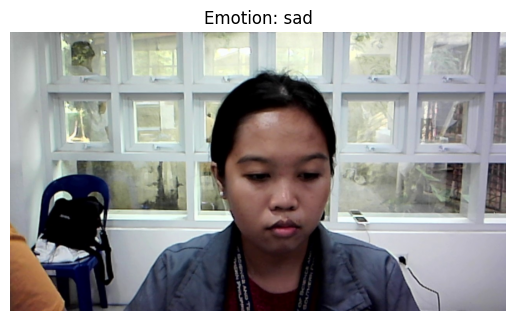

Analyzing images\frame_15.jpg...
Detected emotion: sad


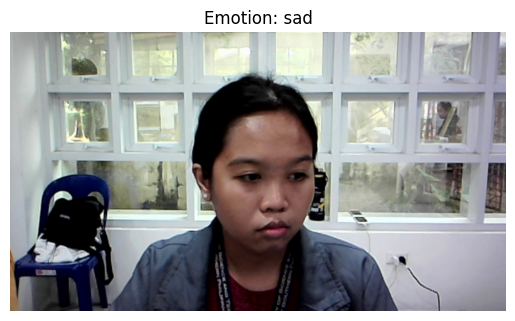

Analyzing images\frame_16.jpg...
Detected emotion: sad


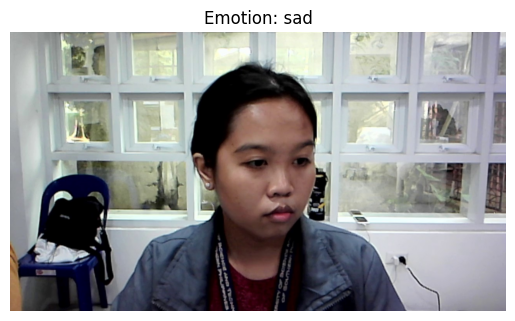

Analyzing images\frame_17.jpg...
Detected emotion: sad


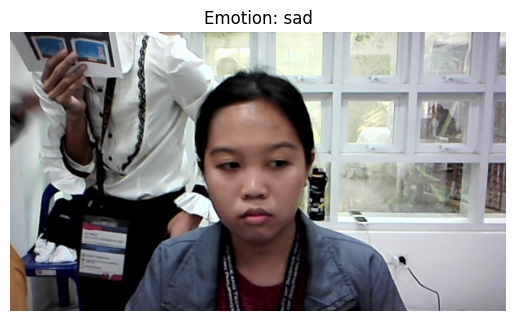

Analyzing images\frame_18.jpg...
Detected emotion: neutral


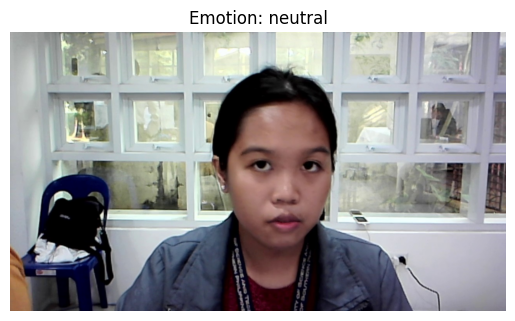

Analyzing images\frame_19.jpg...
Detected emotion: sad


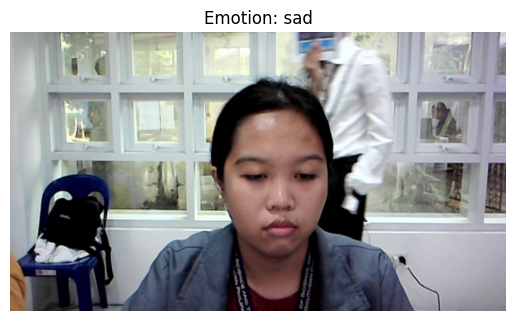

Analyzing images\frame_2.jpg...
Detected emotion: sad


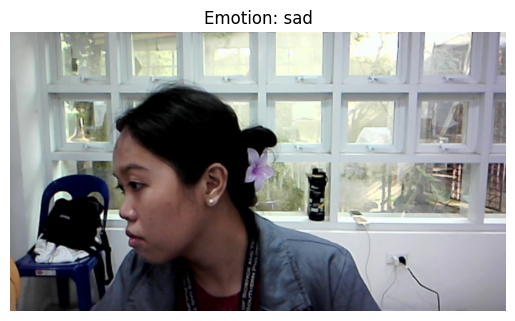

Analyzing images\frame_20.jpg...
Detected emotion: sad


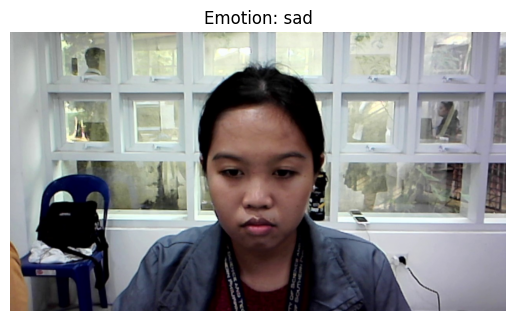

Analyzing images\frame_21.jpg...
Detected emotion: sad


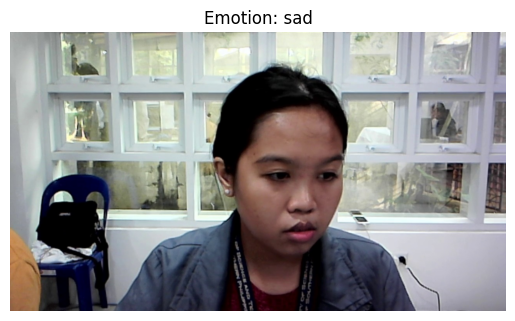

Analyzing images\frame_22.jpg...
Detected emotion: sad


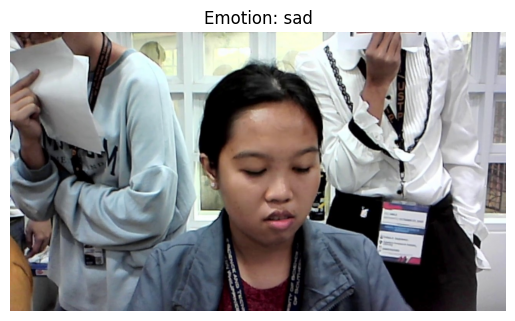

Analyzing images\frame_23.jpg...
Detected emotion: happy


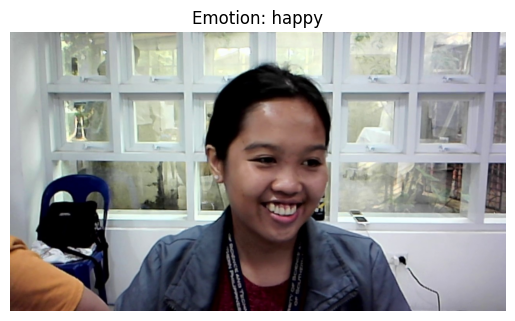

Analyzing images\frame_24.jpg...
Detected emotion: sad


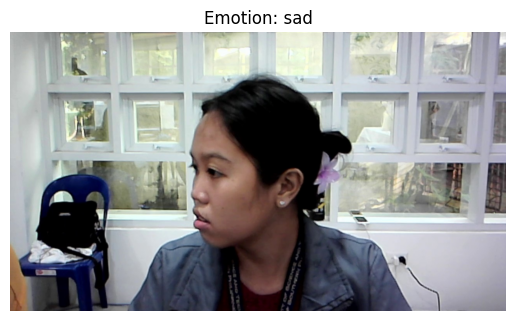

Analyzing images\frame_25.jpg...
Detected emotion: sad


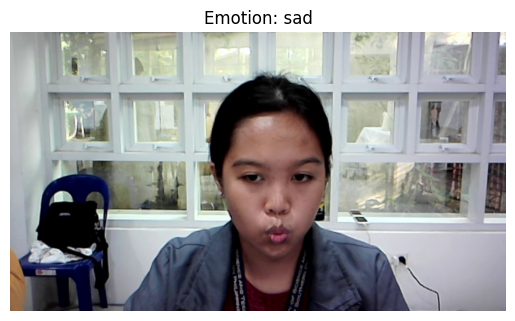

Analyzing images\frame_26.jpg...
Detected emotion: sad


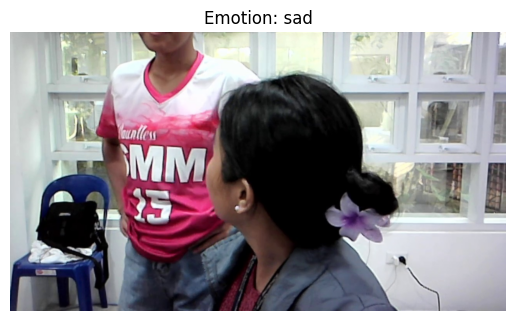

Analyzing images\frame_27.jpg...
Detected emotion: neutral


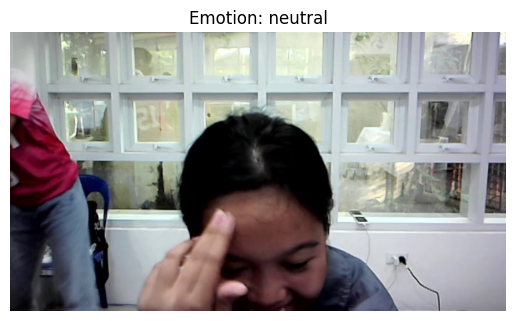

Analyzing images\frame_3.jpg...
Detected emotion: happy


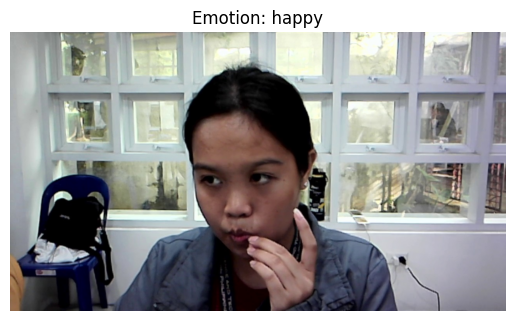

Analyzing images\frame_4.jpg...
Detected emotion: sad


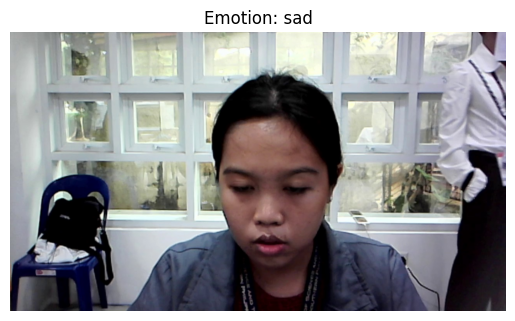

Analyzing images\frame_5.jpg...
Detected emotion: sad


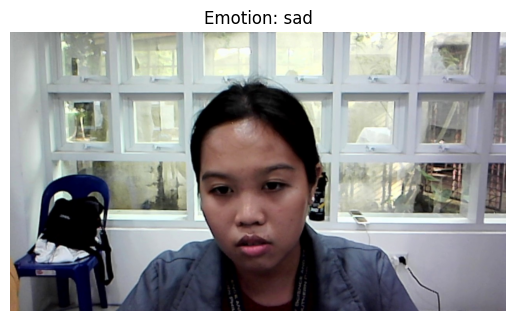

Analyzing images\frame_6.jpg...
Detected emotion: angry


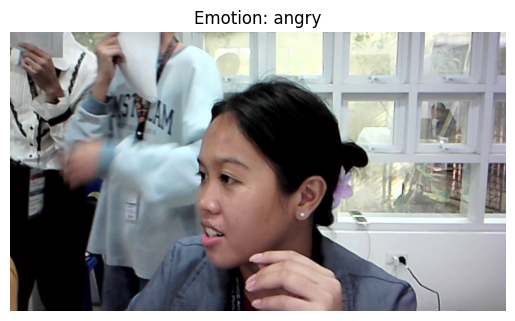

Analyzing images\frame_7.jpg...
Detected emotion: neutral


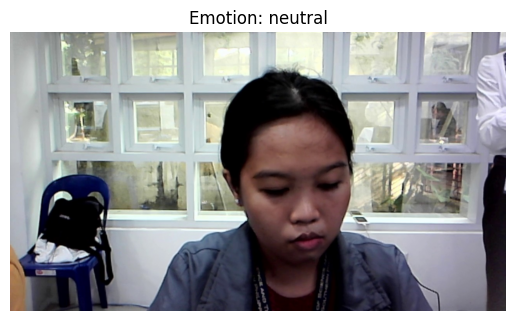

Analyzing images\frame_8.jpg...
Detected emotion: angry


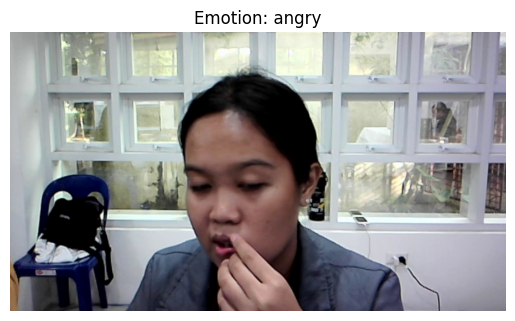

Analyzing images\frame_9.jpg...
Detected emotion: sad


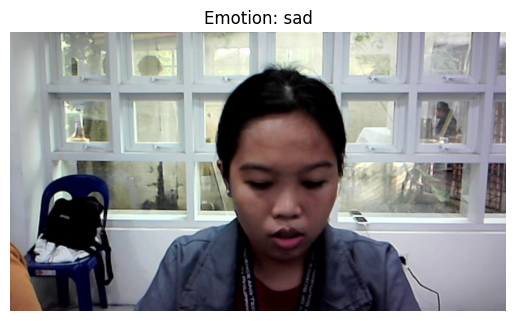

In [4]:

# Step 5: Process each image in the folder (and subfolders) and display the result
results = {}

# Use os.walk to find images in all subdirectories
for root, dirs, files in os.walk("images"):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(root, filename)
            emotion = analyze_emotions(filepath)

            # Store result
            results[filename] = emotion

            # Display result
            img = cv2.imread(filepath)
            if img is not None:
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"Emotion: {emotion}")
                plt.axis("off")
                plt.show()
            else:
                print(f"Could not read image: {filename}")


In [5]:

# Optional: Display all results at the end
print("Emotion analysis results:")
for filename, emotion in results.items():
    print(f"{filename}: {emotion}")

Emotion analysis results:
frame_0.jpg: sad
frame_1.jpg: neutral
frame_10.jpg: sad
frame_11.jpg: sad
frame_12.jpg: neutral
frame_13.jpg: sad
frame_14.jpg: sad
frame_15.jpg: sad
frame_16.jpg: sad
frame_17.jpg: sad
frame_18.jpg: neutral
frame_19.jpg: sad
frame_2.jpg: sad
frame_20.jpg: sad
frame_21.jpg: sad
frame_22.jpg: sad
frame_23.jpg: happy
frame_24.jpg: sad
frame_25.jpg: sad
frame_26.jpg: sad
frame_27.jpg: neutral
frame_3.jpg: happy
frame_4.jpg: sad
frame_5.jpg: sad
frame_6.jpg: angry
frame_7.jpg: neutral
frame_8.jpg: angry
frame_9.jpg: sad
